In [2]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
# loading and reading dataset
df = pd.read_csv("insurance_claims.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
df[['number_location', 'direction_location']] = df['incident_location'].str.split(n=1, expand=True)


In [8]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         6510          13020         52080       Saab   
1       468176  ...          780            780          3510   Mercedes   
2       430632  ...         7700           3850         23100      Dodge   
3       608117  ...         6340           6340         50720  Chevrolet   
4       610706  ...         1300            650          4550     Accura   

  auto_model  auto_year  fraud_reported _c39 number_location  \
0        92x       2004               Y  NaN            9935   
1       E400       2007               Y  NaN            6608   
2        RAM       2007               N  NaN            7121   
3      Tahoe       2014               Y  NaN            6956   
4        RSX       2009               N  NaN            3041   

  direction_location  
0          4th Drive  
1            MLK Hwy  
2       Francis Lane  
3        Maple Drive  
4            3rd Ave  

[5 rows x 42 columns]

In [9]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
df_filter = df[['months_as_customer','age','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported','number_location','direction_location']]
df_filter.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   
2                 134   29       2000-09-06           OH    100/300   
3                 256   41       1990-05-25           IL    250/500   
4                 228   44       2014-06-06           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... total_claim_amount injury_claim property_claim  \
0        MALE  ...              71610         6510          13020   
1        MALE  ...               5070          780            780   
2      FEMALE  ...              34650         7700           3850   
3      FEMALE  ...              63400         6340           6340   
4        MALE  ...               6500         1300            650   

  vehicle_claim  auto_make  auto_model auto_year fraud_reported  \
0         52080       Saab         92x      2004              Y   
1          3510   Mercedes        E400      2007              Y   
2         23100      Dodge         RAM      2007              N   
3         50720  Chevrolet       Tahoe      2014              Y   
4          4550     Accura         RSX      2009              N   

  number_location direction_location  
0            9935          4th Drive  
1            6608            MLK Hwy  
2            7121       Francis Lane  
3            6956        Maple Drive  
4            3041            3rd Ave  

[5 rows x 39 columns]

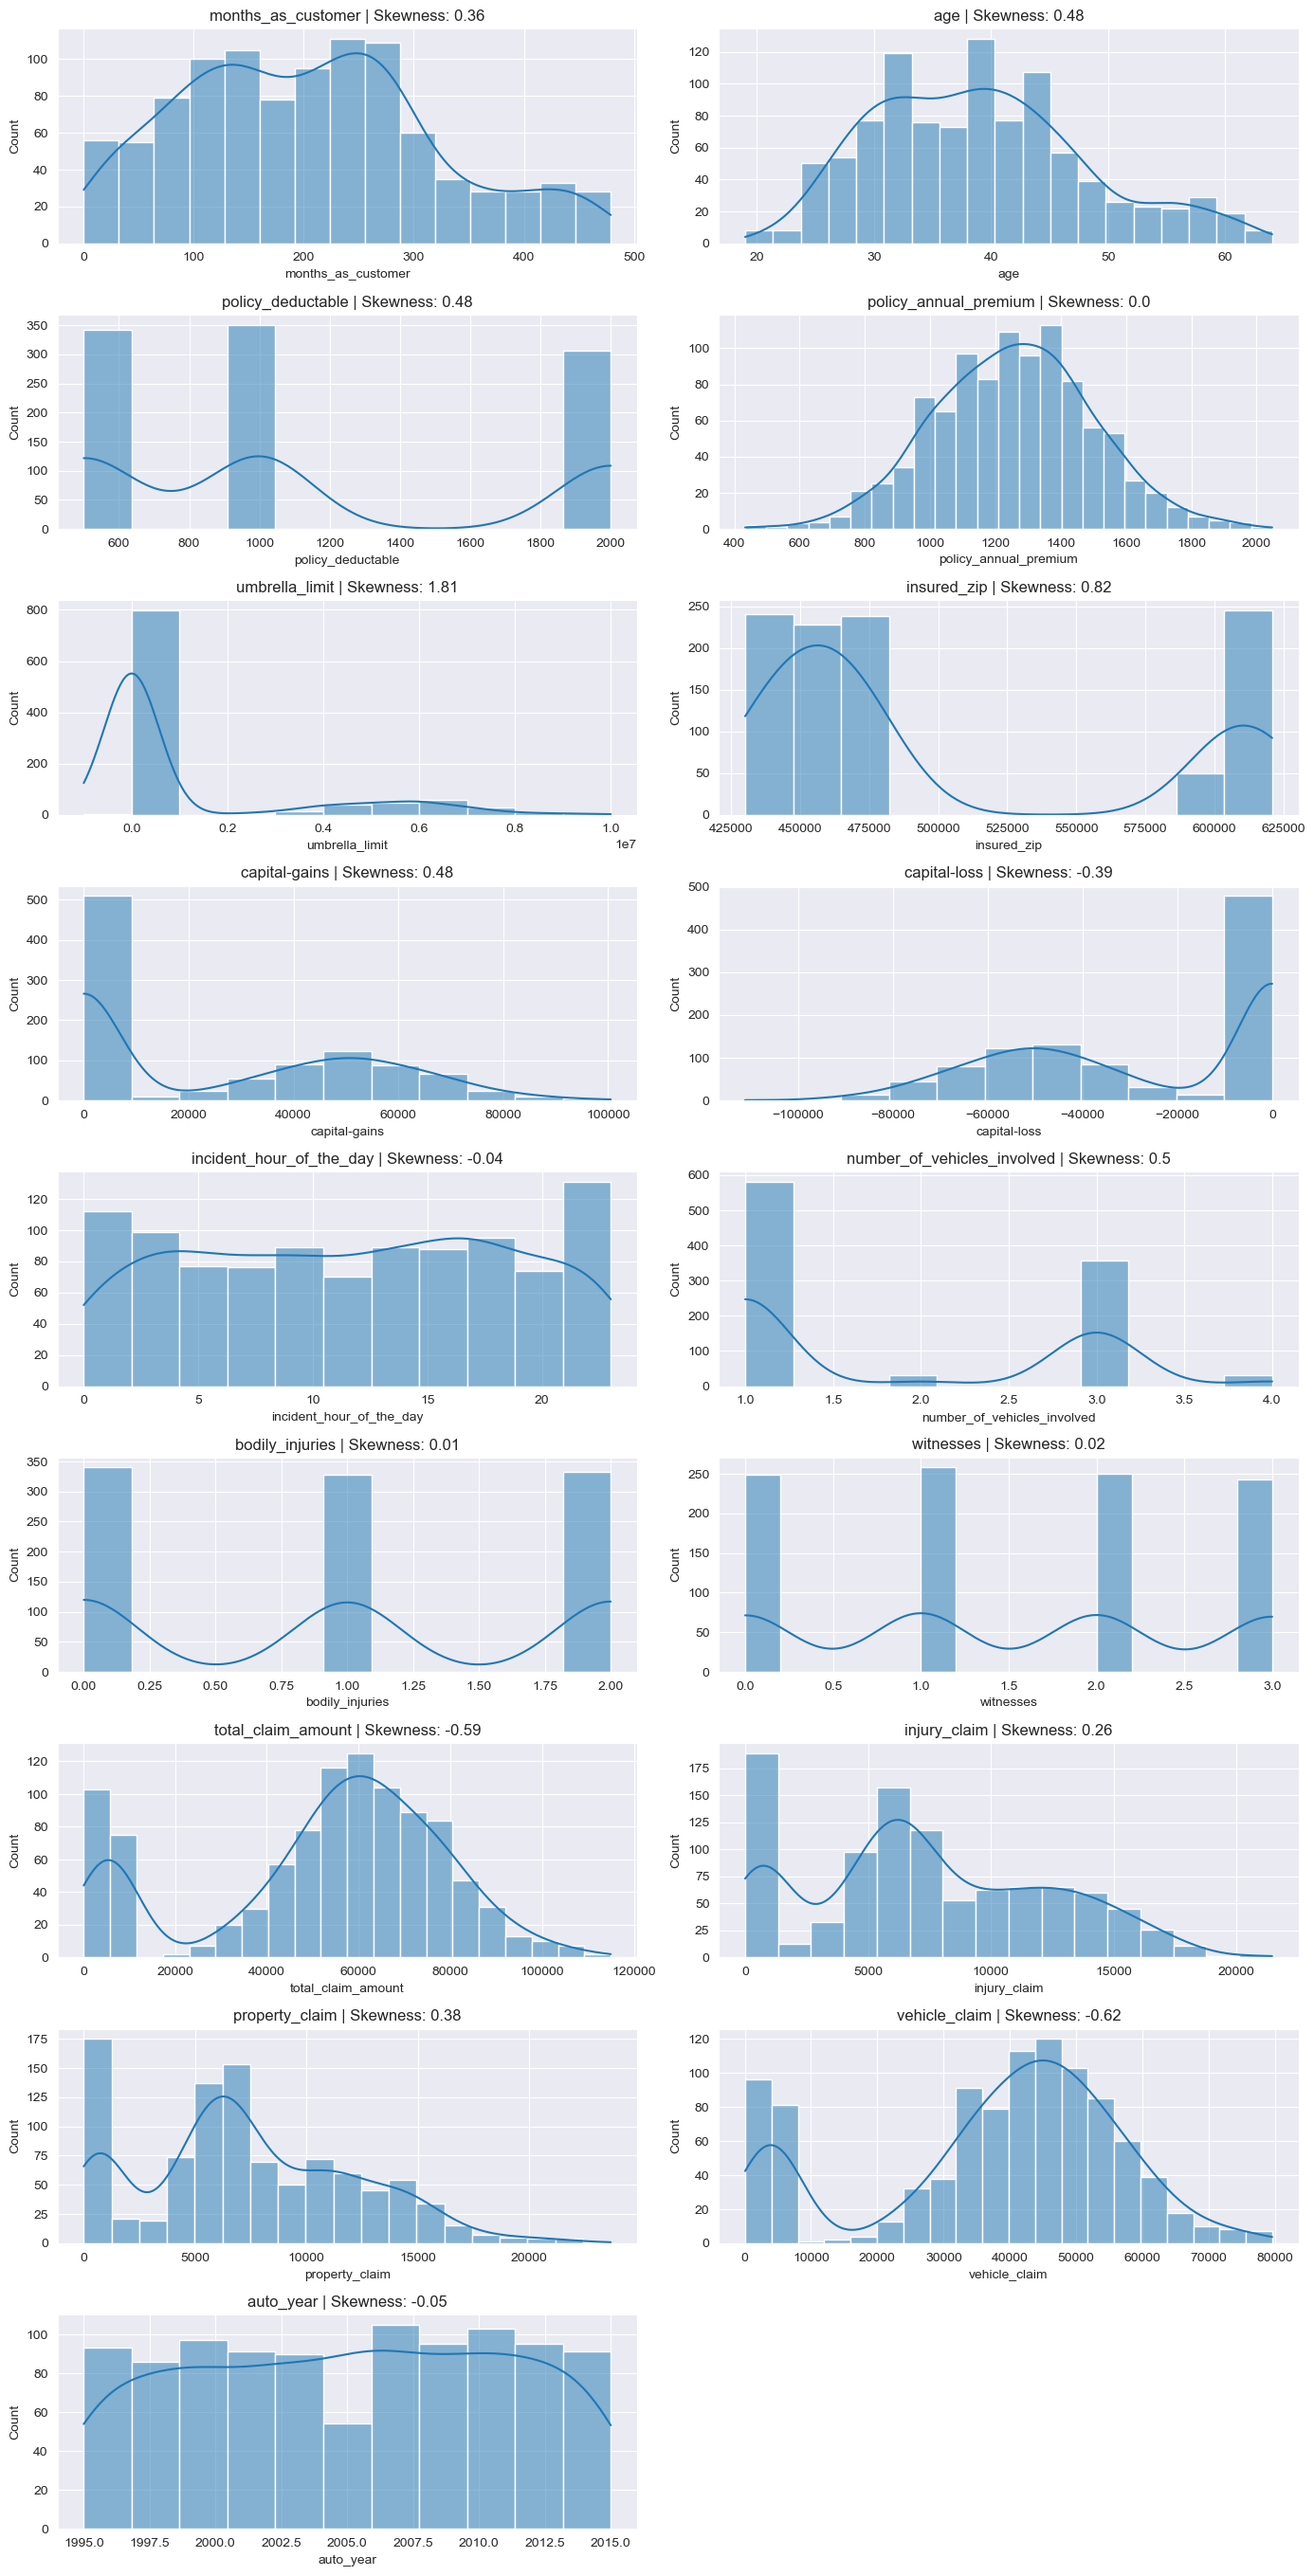

In [18]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df_filter.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_filter[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_filter[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.savefig('grafico_barra.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

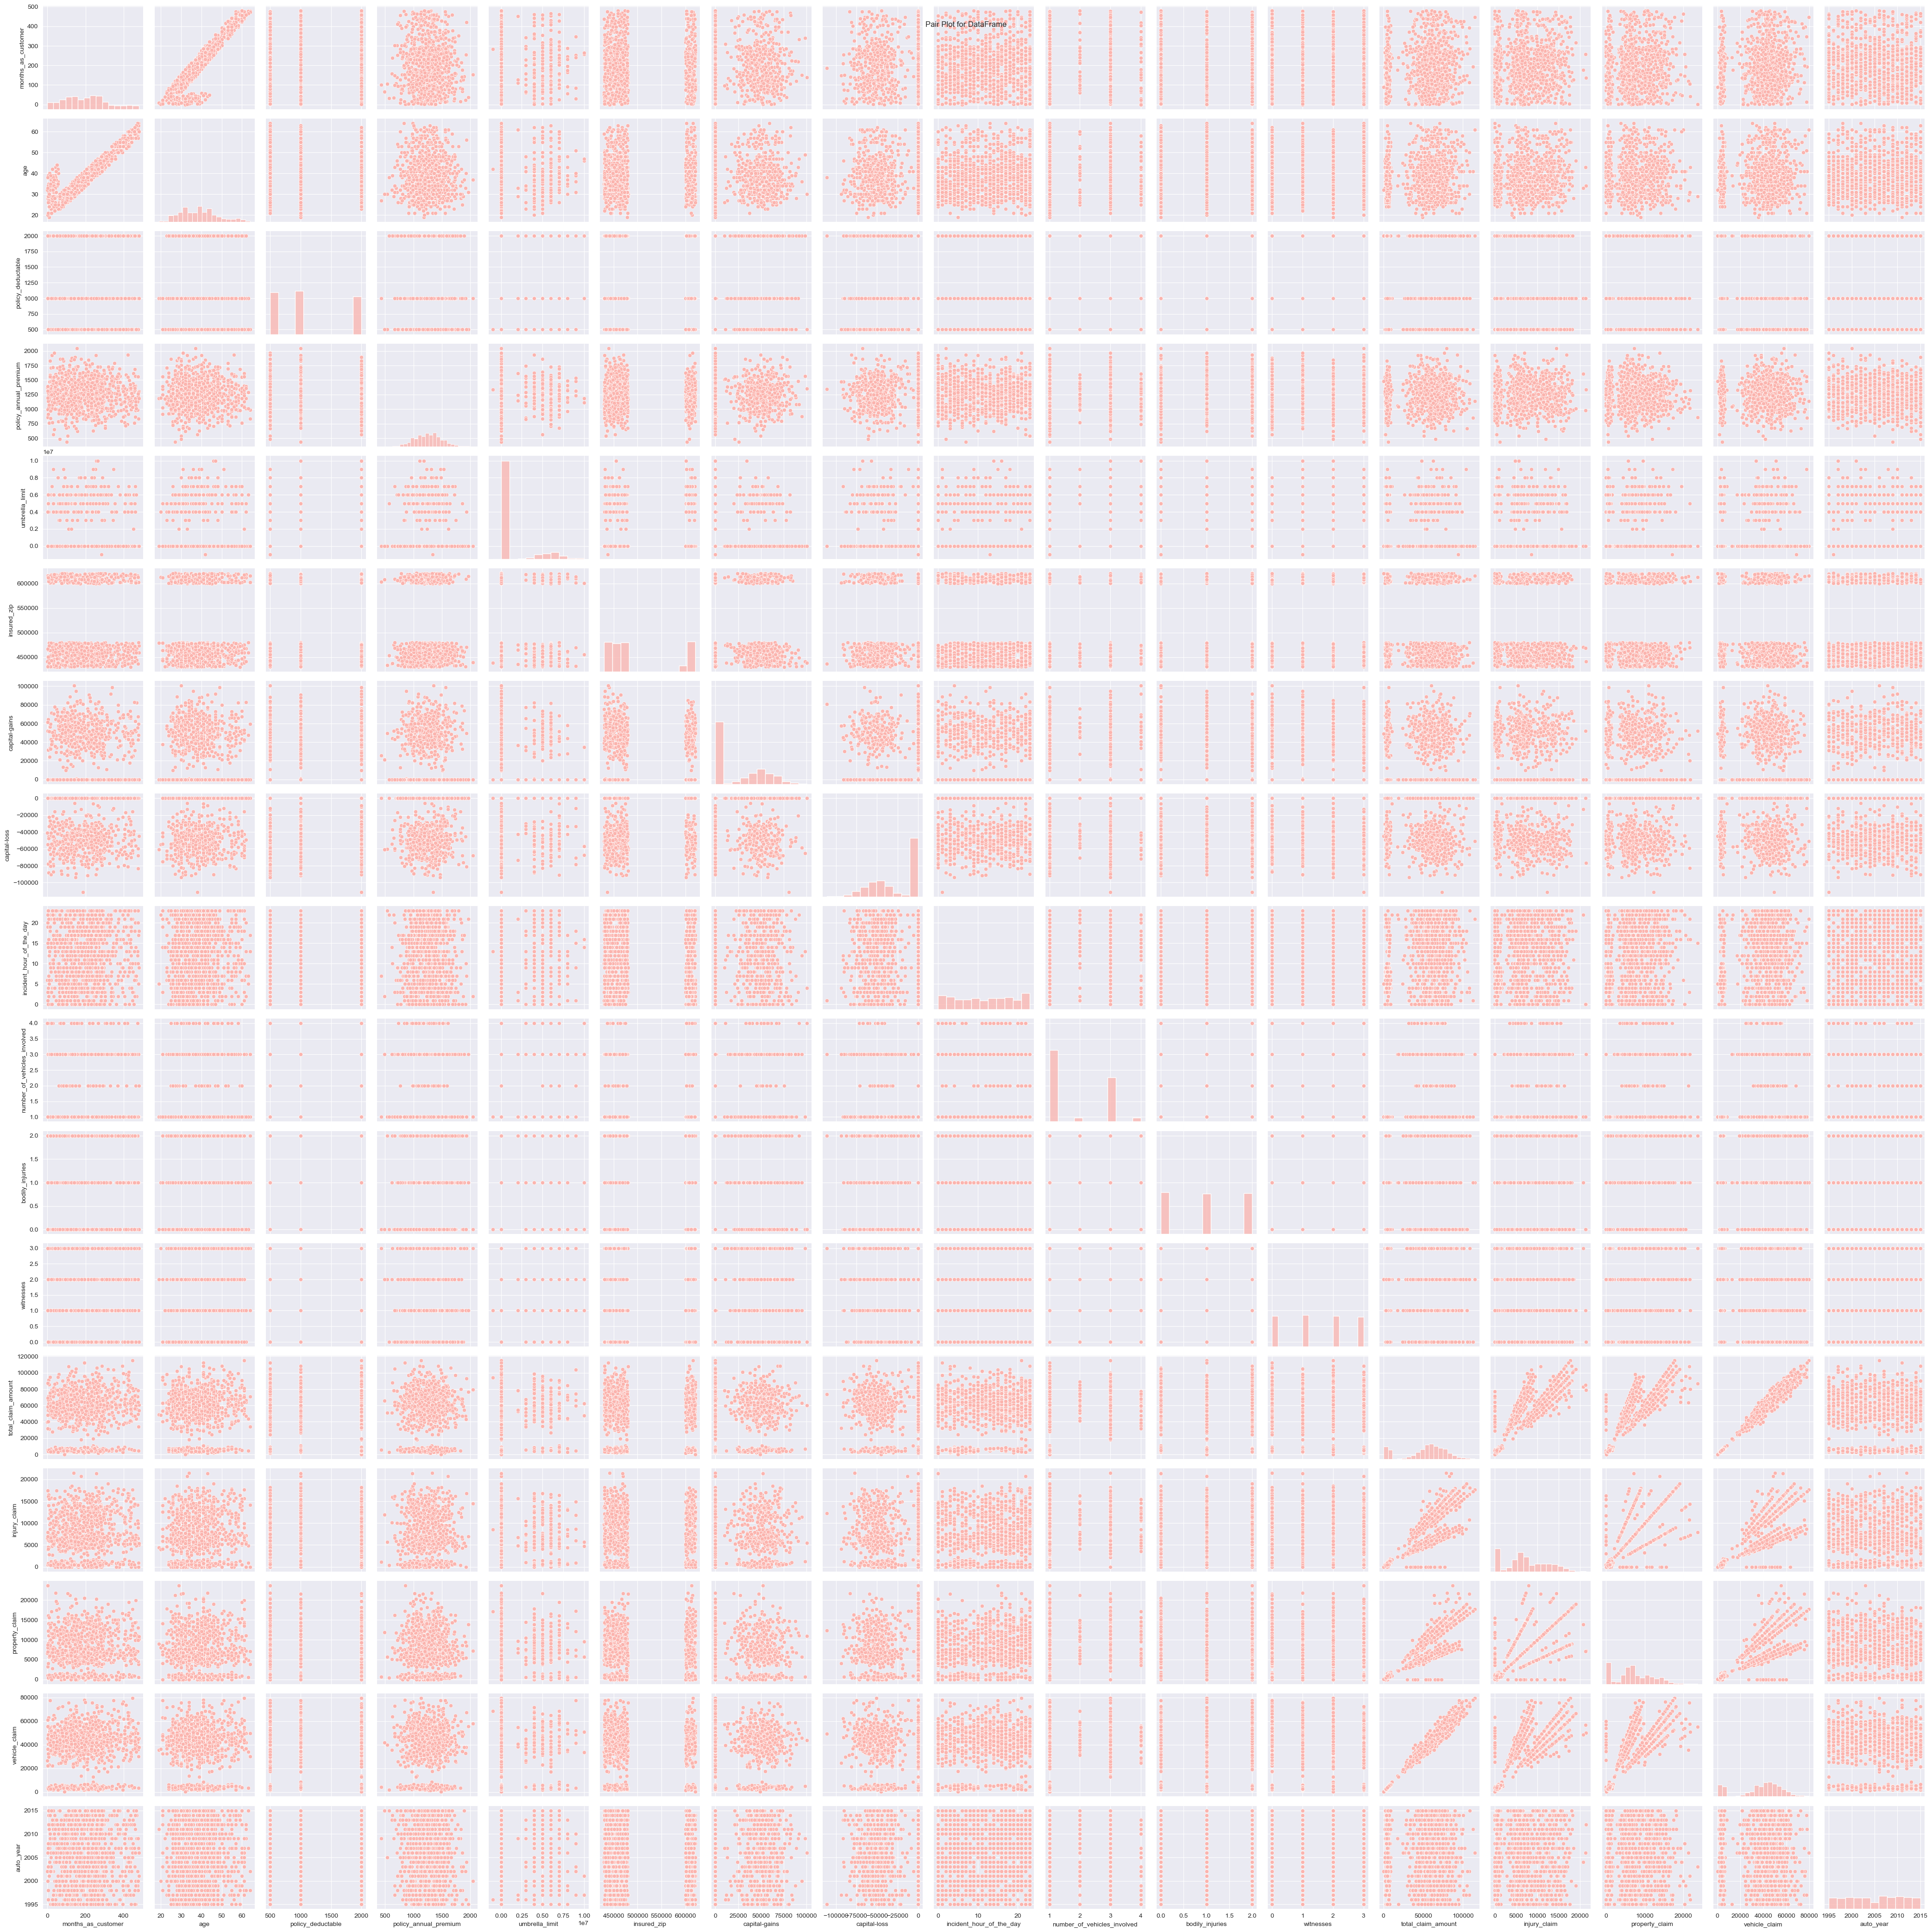

In [20]:
# Set the color palette
sns.set_palette("Pastel1")

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df_filter)

plt.suptitle('Pair Plot for DataFrame')
plt.savefig('distribucion_puntos.png')
plt.show()

<Axes: xlabel='property_claim', ylabel='vehicle_claim'>

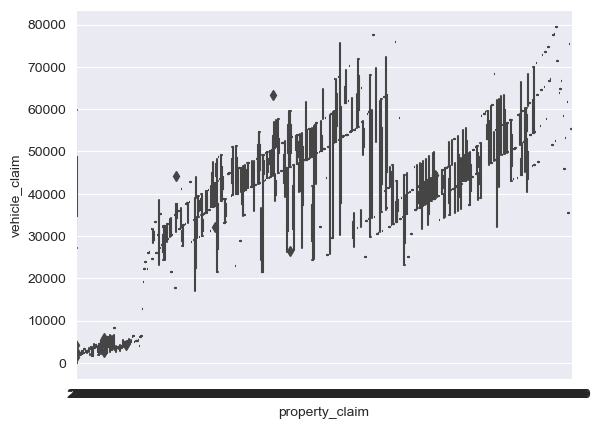

In [21]:
#plotting box plot between alcohol and quality
sns.boxplot(x='property_claim', y='vehicle_claim', data=df_filter)

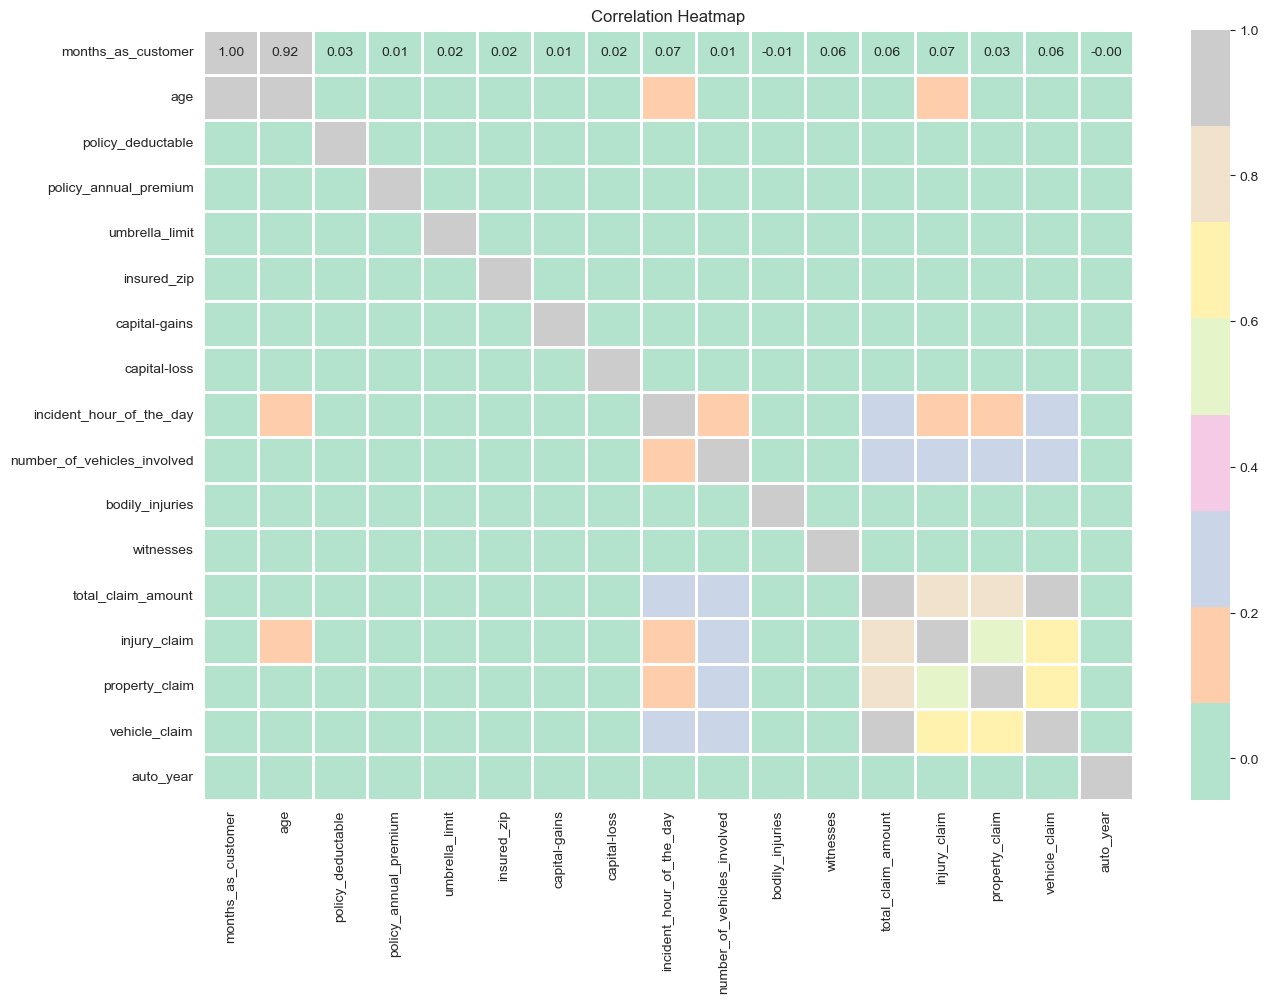

In [27]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))
numerical_columns = df_filter.select_dtypes(include=["int64", "float64"]).columns
# Using Seaborn to create a heatmap
sns.heatmap(df_filter[numerical_columns].corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.savefig('mapa_correlacion.png')
plt.show()

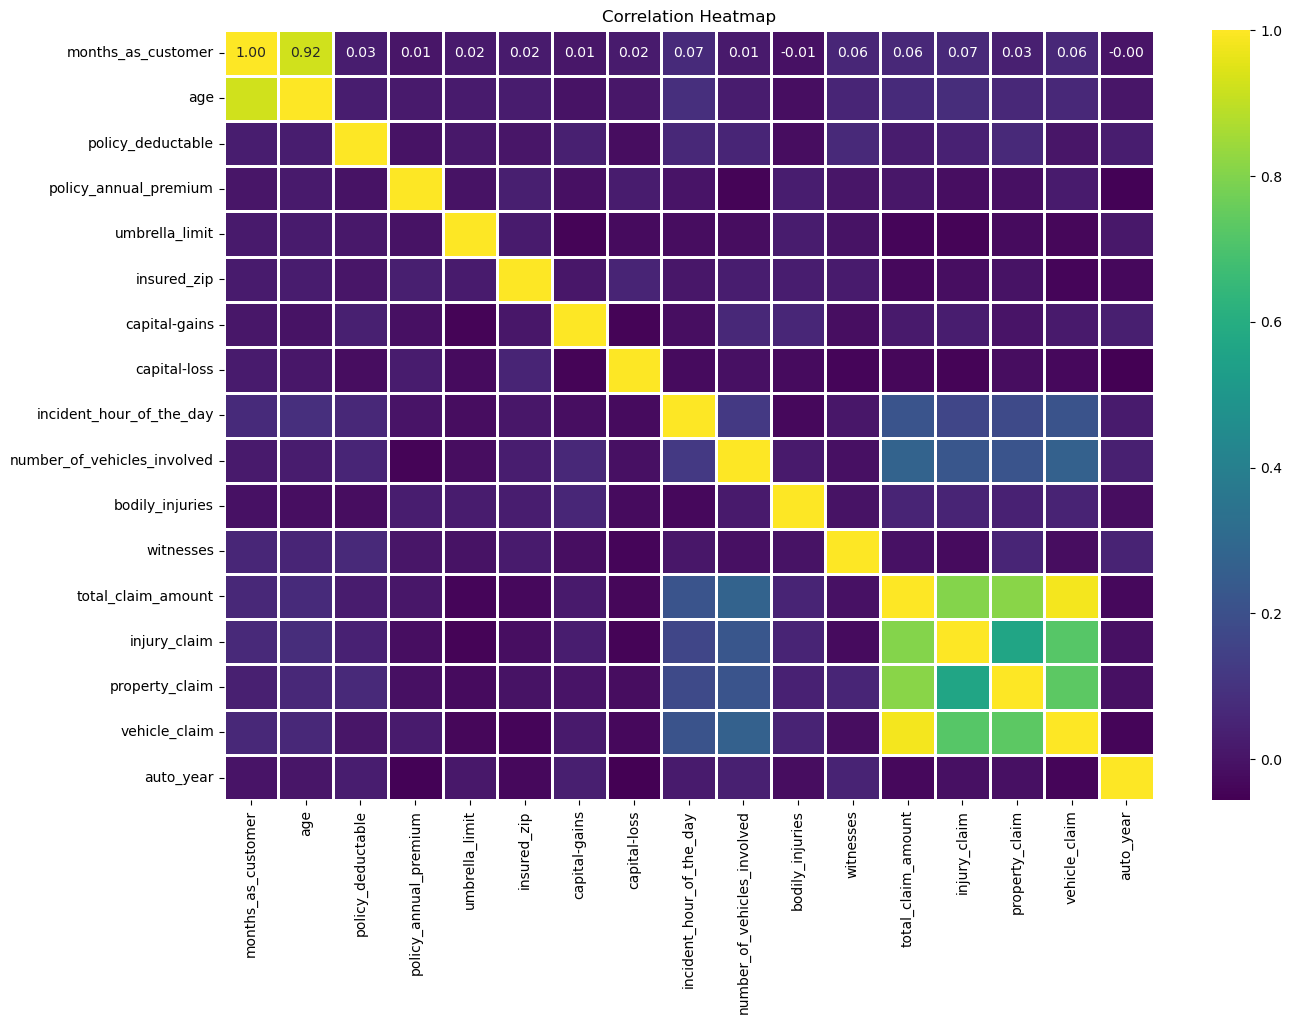

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df_filter' es tu DataFrame filtrado
plt.figure(figsize=(15, 10))

# Seleccionar solo las columnas numéricas
numerical_columns = df_filter.select_dtypes(include=["int64", "float64"]).columns

# Crear el heatmap utilizando Seaborn
sns.heatmap(df_filter[numerical_columns].corr(), annot=True, fmt='.2f', cmap='viridis', linewidths=2)

# Título del gráfico
plt.title('Correlation Heatmap')

# Guardar el gráfico como una imagen
plt.savefig('mapa_correlacion.png')

# Mostrar el gráfico
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Seleccionar características y etiquetas 
X = df[['age', 'months_as_customer', 'injury_claim', 'vehicle_claim', 'total_claim_amount', 'property_claim']] 
# Sustituye por tus columnas 
y = df['fraud_reported'] 
# Sustituye por tu columna de etiquetas
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Evaluar el modelo en el conjunto de prueba
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Accuracy en validación: {val_accuracy}')
print(f'Accuracy en prueba: {test_accuracy}')


Accuracy en validación: 0.71875
Accuracy en prueba: 0.725


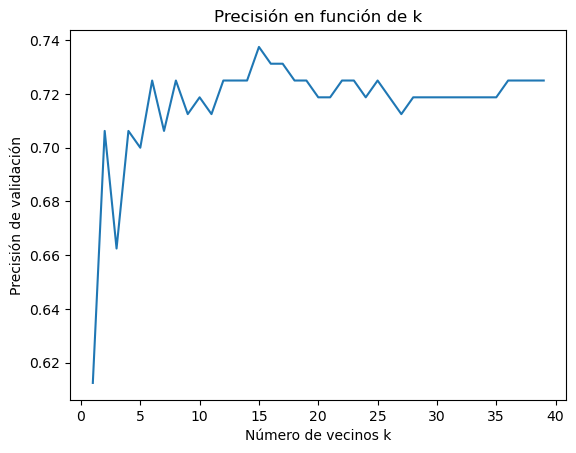

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Seleccionar características y etiquetas
# Seleccionar características y etiquetas 
x = X
# Sustituye por tus columnas 
y = y

# x = df[['feature1', 'feature2', 'feature3']]  # Sustituye por tus columnas
# y = df['label']  # Sustituye por tu columna de etiquetas

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Probar diferentes valores de k
k_range = range(1, 40)
val_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_val_pred = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)

# Graficar la precisión en función de k
plt.plot(k_range, val_scores)
plt.xlabel('Número de vecinos k')
plt.ylabel('Precisión de validación')
plt.title('Precisión en función de k')
plt.savefig('Plot_Accuracy.png')
plt.show()


Confusion Matrix:
[[145   0]
 [ 55   0]]
Accuracy: 0.725
Recall: 0.725
Precision: 0.525625
F1 Score: 0.6094202898550725
ROC AUC: 0.5942319749216302


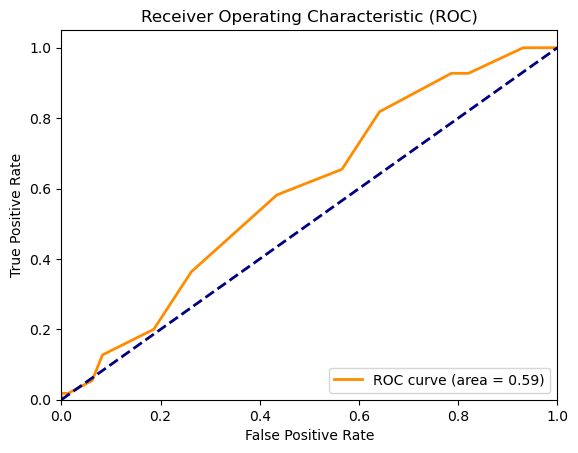

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Leer el dataset

# Seleccionar características y etiquetas
x = df[['age', 'months_as_customer', 'total_claim_amount', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'injury_claim', 'property_claim', 'vehicle_claim']] 
# Sustituye por tus columnas 
y = df['fraud_reported'] 


# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)

# Predecir con el conjunto de validación
y_val_pred = knn.predict(x_val)
y_test_pred = knn.predict(x_test)

# Calcular las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Para ROC y AUC, si tienes más de dos clases, necesitas binarizar las etiquetas
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Mostrar las métricas
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_knn.png')
plt.show()


Confusion Matrix:
[[111  34]
 [ 35  20]]
Accuracy: 0.655
Recall: 0.655
Precision: 0.6530504819888382
F1 Score: 0.6540102146978151
ROC AUC: 0.564576802507837


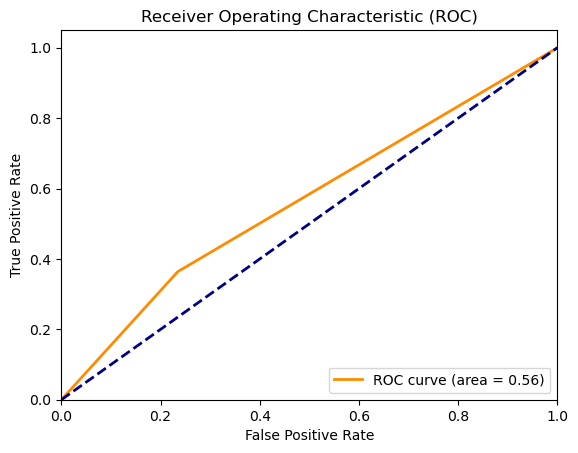

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = clf.predict(x_val)
y_test_pred = clf.predict(x_test)

# Calcular las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Para ROC y AUC, si tienes más de dos clases, necesitas binarizar las etiquetas
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Mostrar las métricas
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_DecisionTreeClassifier.png')
plt.show()


Confusion Matrix:
[[135  10]
 [ 51   4]]
Accuracy: 0.695
Recall: 0.695
Precision: 0.6047811059907834
F1 Score: 0.6232737860676911
ROC AUC: 0.6169905956112853


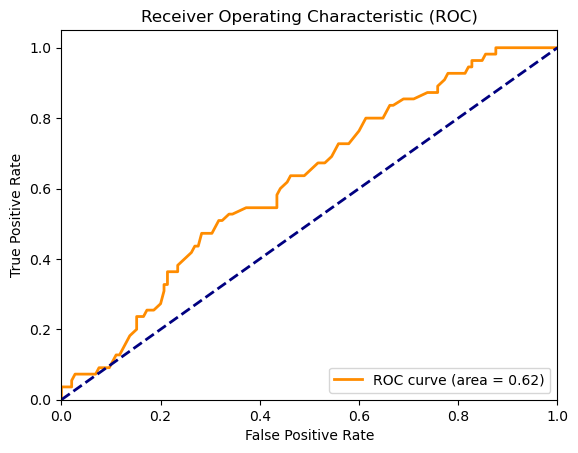

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Entrenar el modelo de Bosque Aleatorio
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = rf.predict(x_val)
y_test_pred = rf.predict(x_test)

# Calcular las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Para ROC y AUC, si tienes más de dos clases, necesitas binarizar las etiquetas
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Mostrar las métricas
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_RandomForestClassifier.png')
plt.show()


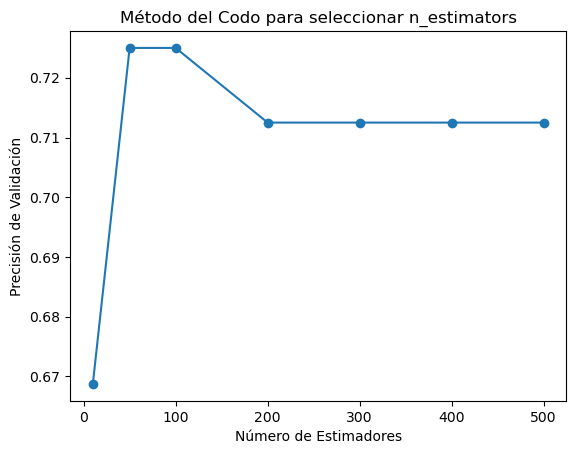

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Definir los parámetros para probar diferentes valores de n_estimators
n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
val_accuracies = []

# Probar cada valor de n_estimators y calcular la precisión en el conjunto de validación
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train, y_train)
    y_val_pred = rf.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Graficar la precisión en función del número de estimadores
plt.plot(n_estimators_range, val_accuracies, marker='o')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión de Validación')
plt.title('Método del Codo para seleccionar n_estimators')
plt.savefig('codo_RandomForestClassifier.png')
plt.show()


Confusion Matrix:
[[133  12]
 [ 50   5]]
Accuracy: 0.69
Recall: 0.69
Precision: 0.6077949212471875
F1 Score: 0.6261517615176152
ROC AUC: 0.5326018808777429


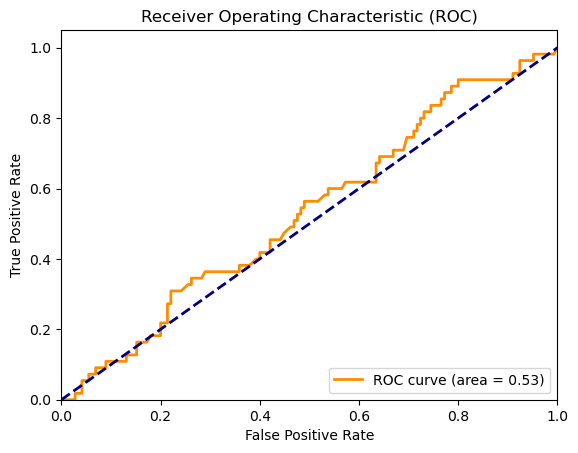

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Entrenar el modelo AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = ada.predict(x_val)
y_test_pred = ada.predict(x_test)

# Calcular las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Para ROC y AUC, si tienes más de dos clases, necesitas binarizar las etiquetas
fpr, tpr, thresholds = roc_curve(y_test, ada.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Mostrar las métricas
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_AdaBoostClassifier.png')
plt.show()


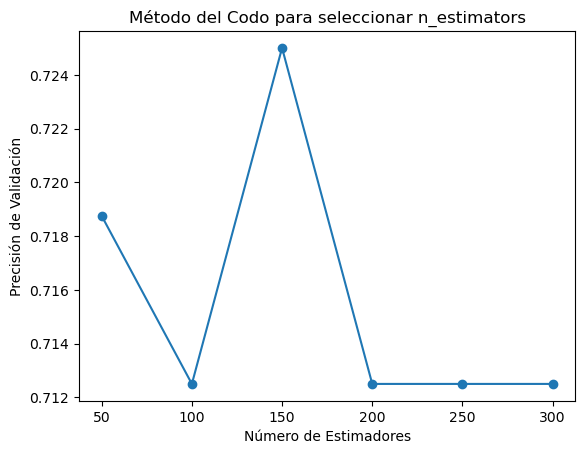

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Definir los parámetros para probar diferentes valores de n_estimators
n_estimators_range = [50, 100, 150, 200, 250, 300]
val_accuracies = []

# Probar cada valor de n_estimators y calcular la precisión en el conjunto de validación
for n in n_estimators_range:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(x_train, y_train)
    y_val_pred = ada.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Graficar la precisión en función del número de estimadores
plt.plot(n_estimators_range, val_accuracies, marker='o')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión de Validación')
plt.title('Método del Codo para seleccionar n_estimators')
plt.show()


Confusion Matrix:
[[144   1]
 [ 54   1]]
Accuracy: 0.725
Recall: 0.725
Precision: 0.6647727272727272
F1 Score: 0.6183954784921487
ROC AUC: 0.5873354231974921


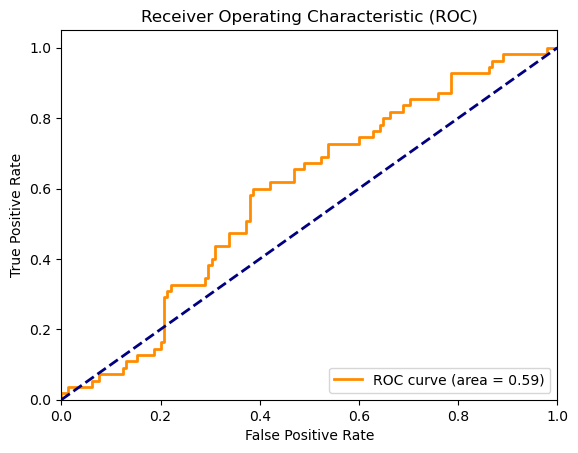

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Entrenar el modelo de Perceptrón Multicapa
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
mlp.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = mlp.predict(x_val)
y_test_pred = mlp.predict(x_test)

# Calcular las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Para ROC y AUC, si tienes más de dos clases, necesitas binarizar las etiquetas
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Mostrar las métricas
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_MLPClassifier.png')
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Seleccionar características y etiquetas
x = X
# Sustituye por tus columnas 
y = y

# Dividir el dataset en 80% entrenamiento y 20% prueba
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'max_iter': [200, 300, 400]
}

# Inicializar el modelo
mlp = MLPClassifier(random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
mlp_best = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], max_iter=best_params['max_iter'], random_state=42)
mlp_best.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = mlp_best.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy en validación: {val_accuracy}')


Mejores parámetros: {'hidden_layer_sizes': (50,), 'max_iter': 200}
Accuracy en validación: 0.73125


In [61]:
# pd.__version__
pip list

SyntaxError: invalid syntax (180613844.py, line 2)